In [32]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install joblib
!pip install streamlit





[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.2.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 4.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.9 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.9 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 2.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 2.7 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.9 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.9 MB 2.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 2.1 MB/s


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
url = r"D:\RESERCH\data_ports\potato_data\potatodata.csv"
data = pd.read_csv(url, encoding='latin-1')
data.head()

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [49]:
data.head(2)

,farmer-id,date,vegetable,variety,sold_price_Welimada,sold_price_Nuwara Eliya,sold_price_Bandarawela,Welimada_Temperature(°C),Welimada_Rainfall(mm),NuwaraEliya_Temperature(°C),NuwaraEliya_Rainfall(mm),Bandarawela_Temperature(°C),Bandarawela_Rainfall(mm),Province,Selling Market
0,f1,01-01-2024,Potato,Desire,290.0,NaN,NaN,22.5,5.0,NaN,NaN,NaN,NaN,Uva Province,Welimada
1,f2,01-02-2024,Potato,Amova,300.0,NaN,NaN,21.1,9.7,NaN,NaN,NaN,NaN,Uva Province,Welimada


In [50]:

numeric_cols = [
    'sold_price_Welimada', 'sold_price_Nuwara Eliya', 'sold_price_Bandarawela',
    'Welimada_Temperature(°C)', 'Welimada_Rainfall(mm)',
    'NuwaraEliya_Temperature(°C)', 'NuwaraEliya_Rainfall(mm)',
    'Bandarawela_Temperature(°C)', 'Bandarawela_Rainfall(mm)'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [51]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   farmer-id                    1298 non-null   object 
 1   date                         1298 non-null   object 
 2   vegetable                    1298 non-null   object 
 3   variety                      1298 non-null   object 
 4   sold_price_Welimada          568 non-null    float64
 5   sold_price_Nuwara Eliya      340 non-null    float64
 6   sold_price_Bandarawela       390 non-null    float64
 7   Welimada_Temperature(°C)     568 non-null    float64
 8   Welimada_Rainfall(mm)        568 non-null    float64
 9   NuwaraEliya_Temperature(°C)  340 non-null    float64
 10  NuwaraEliya_Rainfall(mm)     340 non-null    float64
 11  Bandarawela_Temperature(°C)  390 non-null    float64
 12  Bandarawela_Rainfall(mm)     390 non-null    float64
 13  Province          

In [52]:

welimada_data = data[data['sold_price_Welimada'].notnull()].copy()


In [53]:
features = [
    'vegetable', 'variety', 'Welimada_Temperature(°C)',
    'Welimada_Rainfall(mm)', 'Province', 'Selling Market'
]

target = 'sold_price_Welimada'


In [54]:
data.head(2)

,farmer-id,date,vegetable,variety,sold_price_Welimada,sold_price_Nuwara Eliya,sold_price_Bandarawela,Welimada_Temperature(°C),Welimada_Rainfall(mm),NuwaraEliya_Temperature(°C),NuwaraEliya_Rainfall(mm),Bandarawela_Temperature(°C),Bandarawela_Rainfall(mm),Province,Selling Market
0,f1,01-01-2024,Potato,Desire,290.0,NaN,NaN,22.5,5.0,NaN,NaN,NaN,NaN,Uva Province,Welimada
1,f2,01-02-2024,Potato,Amova,300.0,NaN,NaN,21.1,9.7,NaN,NaN,NaN,NaN,Uva Province,Welimada


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['vegetable', 'variety', 'Province', 'Selling Market']:
    welimada_data[col] = le.fit_transform(welimada_data[col])



In [56]:


from sklearn.model_selection import train_test_split

X = welimada_data[features]
y = welimada_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [58]:
import joblib
joblib.dump(model, 'potato_price_model.pkl')


['potato_price_model.pkl']

In [59]:
print(model)


RandomForestRegressor(random_state=42)


In [60]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.45254318294199547
RMSE: 36.45207616918254


In [61]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_check.head(10))


     Actual   Predicted
218   375.0  261.310676
79    345.0  334.959994
104   215.0  216.102321
208   225.0  218.094544
543   315.0  261.097175
537   290.0  334.876328
420   290.0  275.485000
55    255.0  254.773472
257   225.0  251.899425
526   300.0  298.894048


In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib

# Sample dataset
df = pd.DataFrame({
    'vegetable': ['Potato', 'Potato', 'Potato'],
    'variety': ['Granola', 'Granola', 'Local'],
    'market': ['Nuwara Eliya', 'Bandarawela', 'Welimada'],
    'temperature': [18.5, 22.1, 25.3],
    'rainfall': [22.3, 18.4, 10.0],
    'province': ['Central', 'Uva', 'Central'],
    'selling_market': ['Colombo', 'Kandy', 'Colombo'],
    'price': [120, 110, 125]
})

# Encode categorical features
le_veg = LabelEncoder()
le_var = LabelEncoder()
le_mkt = LabelEncoder()
le_prov = LabelEncoder()
le_sell = LabelEncoder()

df['vegetable'] = le_veg.fit_transform(df['vegetable'])
df['variety'] = le_var.fit_transform(df['variety'])
df['market'] = le_mkt.fit_transform(df['market'])
df['province'] = le_prov.fit_transform(df['province'])
df['selling_market'] = le_sell.fit_transform(df['selling_market'])

X = df[['temperature', 'rainfall', 'vegetable', 'variety', 'market', 'province', 'selling_market']]
y = df['price']

model = RandomForestRegressor()
model.fit(X, y)

# Save model and encoders
joblib.dump(model, 'potato_price_model.pkl')
joblib.dump([le_veg, le_var, le_mkt, le_prov, le_sell], 'label_encoders.pkl')


['label_encoders.pkl']

In [63]:
from sklearn.linear_model import LinearRegression  # or any model you're using
from sklearn.model_selection import train_test_split

# Example: assuming X = features and y = target (potato price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [78]:
import joblib

# Save the model to a file
joblib.dump(model, 'potato_price_model.pkl')


['potato_price_model.pkl']

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def train_model_for_market(data, market_col, market_name):
    market_data = data[data[market_col].notnull()].copy()
    market_data['date'] = pd.to_datetime(market_data['date'], dayfirst=True, errors='coerce')

    market_data['Month'] = market_data['date'].dt.month
    market_data['DayOfYear'] = market_data['date'].dt.dayofyear

    temp_col = f"{market_name}_Temperature(°C)"
    rain_col = f"{market_name}_Rainfall(mm)"

    features = ['vegetable', 'variety', temp_col, rain_col, 'Province', 'Selling Market', 'Month', 'DayOfYear']
    target = market_col

    # Encode
    le_veg = LabelEncoder()
    le_var = LabelEncoder()
    le_prov = LabelEncoder()
    le_market = LabelEncoder()

    market_data['vegetable'] = le_veg.fit_transform(market_data['vegetable'])
    market_data['variety'] = le_var.fit_transform(market_data['variety'])
    market_data['Province'] = le_prov.fit_transform(market_data['Province'])
    market_data['Selling Market'] = le_market.fit_transform(market_data['Selling Market'])

    X = market_data[features]
    y = market_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\n=== {market_name} Model ===")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

    # Save model & encoders
    joblib.dump(model, f"{market_name.lower()}_model.pkl")
    joblib.dump(le_veg, f"{market_name.lower()}_vegetable_encoder.pkl")
    joblib.dump(le_var, f"{market_name.lower()}_variety_encoder.pkl")
    joblib.dump(le_prov, f"{market_name.lower()}_province_encoder.pkl")
    joblib.dump(le_market, f"{market_name.lower()}_market_encoder.pkl")

    # Plot Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{market_name} – Actual vs Predicted")
    plt.grid(True)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree reference line
    plt.tight_layout()
    plt.show()

    return model



=== Welimada Model ===
R² Score: 0.3485998114363449
RMSE: 39.762279616010325


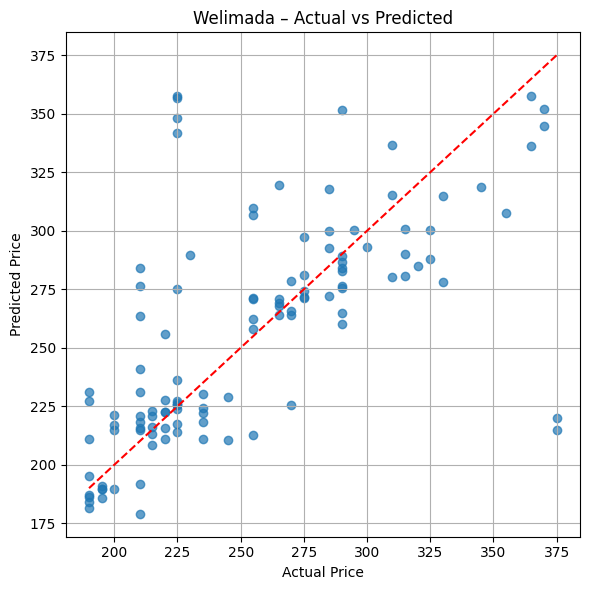


=== Bandarawela Model ===
R² Score: 0.6493094126432353
RMSE: 27.309333144318074


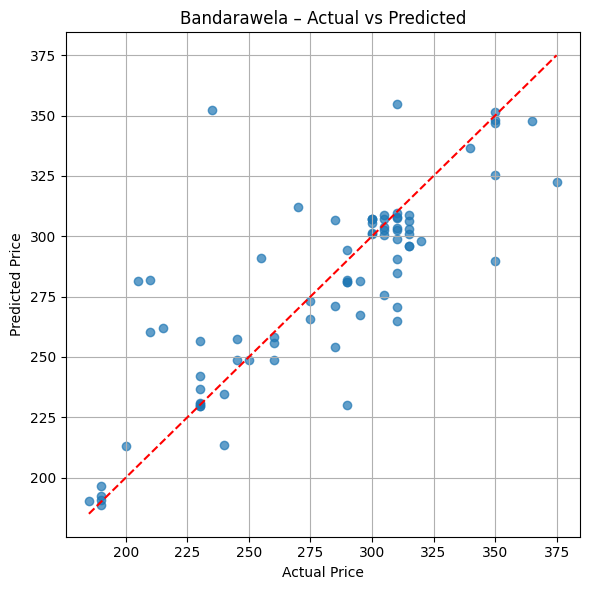


=== NuwaraEliya Model ===
R² Score: 0.7612988985158538
RMSE: 23.666752636197696


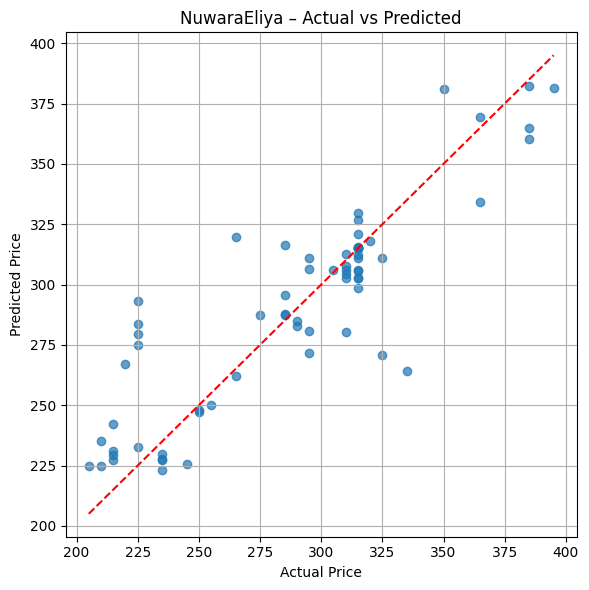

In [84]:
welimada_model = train_model_for_market(data, 'sold_price_Welimada', 'Welimada')
bandarawela_model = train_model_for_market(data, 'sold_price_Bandarawela', 'Bandarawela')
nuwara_eliya_model = train_model_for_market(data, 'sold_price_Nuwara Eliya', 'NuwaraEliya')


ValueError: x and y must be the same size

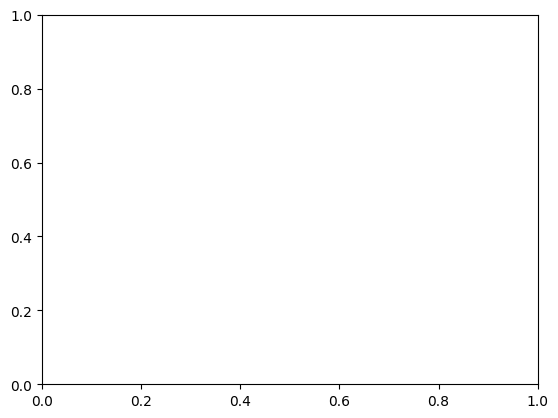

In [82]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

In [87]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(y_test, y_pred, market_name="Market"):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    if y_test.shape[0] != y_pred.shape[0]:
        print("❌ Cannot plot: x and y are not the same length.")
        print(f"y_test size: {y_test.shape[0]}, y_pred size: {y_pred.shape[0]}")
        return

    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{market_name} – Actual vs Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [88]:
y_pred = model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred, "Welimada")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- market
- province
- selling_market
- variety
- vegetable



=== Welimada Model ===
R² Score: 0.2998164867830342
RMSE: 41.22429861038618

=== Bandarawela Model ===
R² Score: 0.6493094126432353
RMSE: 27.309333144318074


C:\Users\DamithaDhananjaya\AppData\Local\Temp\ipykernel_11684\2987986060.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  market_data['date'] = pd.to_datetime(market_data['date'], errors='coerce')
C:\Users\DamithaDhananjaya\AppData\Local\Temp\ipykernel_11684\2987986060.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  market_data['date'] = pd.to_datetime(market_data['date'], errors='coerce')



=== NuwaraEliya Model ===
R² Score: 0.7612988985158538
RMSE: 23.666752636197696


In [72]:
welimada_model = train_model_for_market(data, 'sold_price_Welimada', 'Welimada')
bandarawela_model = train_model_for_market(data, 'sold_price_Bandarawela', 'Bandarawela')
nuwara_eliya_model = train_model_for_market(data, 'sold_price_Nuwara Eliya', 'NuwaraEliya')



=== Welimada Model ===
R² Score: 0.45254318294199547
RMSE: 36.45207616918254

=== Bandarawela Model ===
R² Score: 0.6977007507952633
RMSE: 25.35523119868544

=== NuwaraEliya Model ===
R² Score: 0.8026792250773005
RMSE: 21.51779998219183


In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(25, color='red', linestyle='--')
plt.axhline(-25, color='red', linestyle='--')
plt.title("Residuals vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'residuals' is not defined

<Figure size 800x500 with 0 Axes>

In [67]:
import os
print(os.getcwd())


D:\RESERCH\Vegitable price prediction\Model


In [ ]:
data.head(5)

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Example dataset (replace with your actual cleaned and prepared data)
X = df[['temperature', 'rainfall']]  # Features used for prediction
y = df['price']  # Target: actual price

model = RandomForestRegressor()
model.fit(X, y)


RandomForestRegressor()